# Sales Predicition
- Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

- loading DataSet


In [2]:
data = pd.read_csv('Advertising.csv')


- Exploring Data

In [3]:
data.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
154,155,187.8,21.1,9.5,15.6
159,160,131.7,18.4,34.6,12.9
113,114,209.6,20.6,10.7,15.9
160,161,172.5,18.1,30.7,14.4
57,58,136.2,19.2,16.6,13.2
133,134,219.8,33.5,45.1,19.6
59,60,210.7,29.5,9.3,18.4
44,45,25.1,25.7,43.3,8.5
95,96,163.3,31.6,52.9,16.9
104,105,238.2,34.3,5.3,20.7


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
data.isnull().values.any()

False

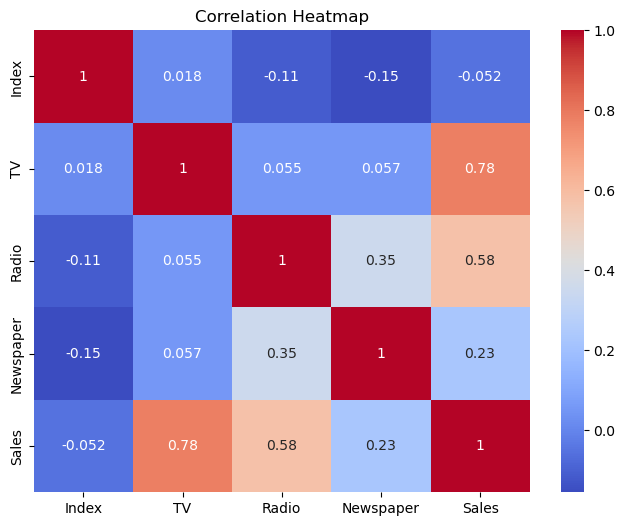

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
data.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### DATA UNDERSTANDING

- VISULIZATION

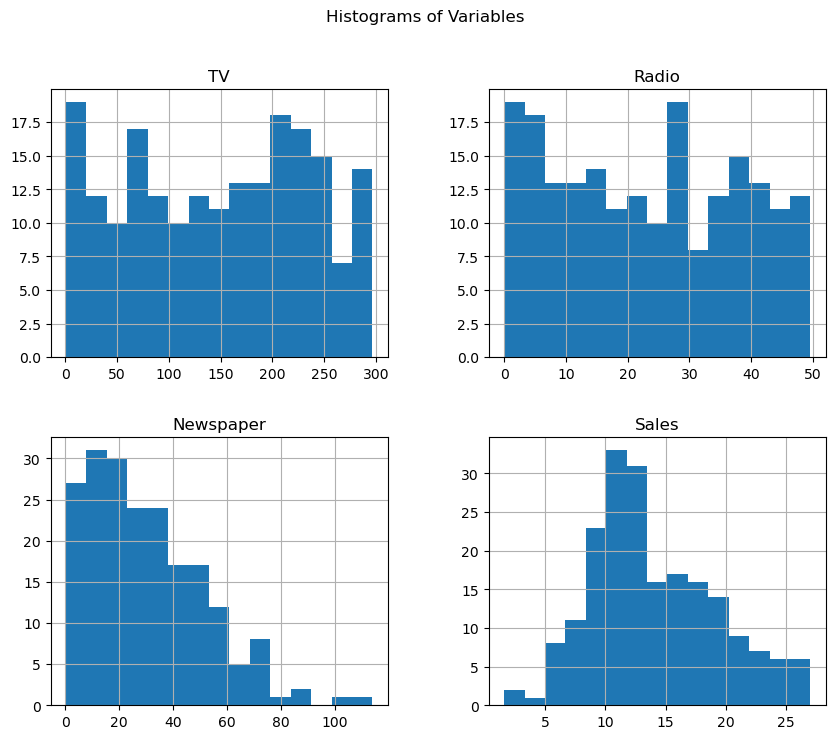

In [13]:
data[['TV', 'Radio', 'Newspaper', 'Sales']].hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms of Variables")
plt.show()

- Relationships between advertising budgets and sales

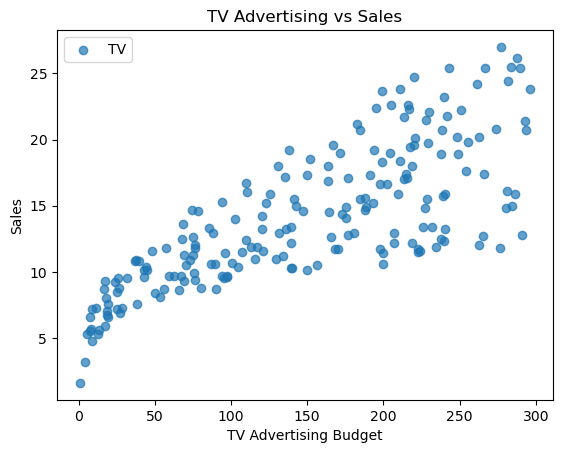

In [14]:
plt.scatter(data['TV'], data['Sales'], alpha=0.7, label='TV')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()


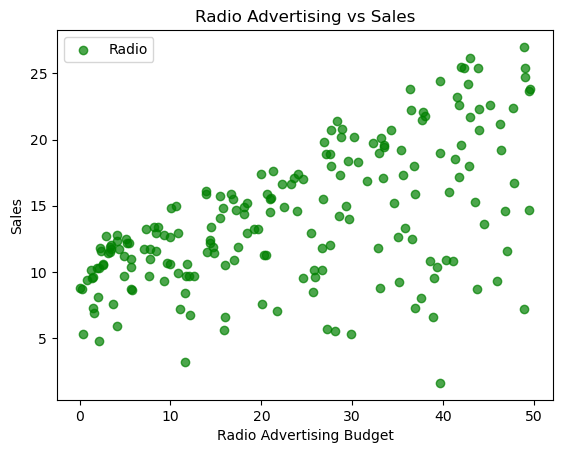

In [15]:
plt.scatter(data['Radio'], data['Sales'], alpha=0.7, color='green', label='Radio')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio Advertising vs Sales')
plt.legend()
plt.show()

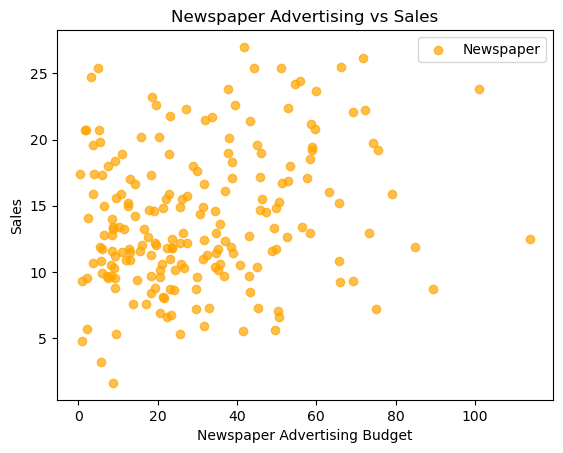

In [16]:
plt.scatter(data['Newspaper'], data['Sales'], alpha=0.7, color='orange', label='Newspaper')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs Sales')
plt.legend()
plt.show()

- Checking for outliers in advertising budgets

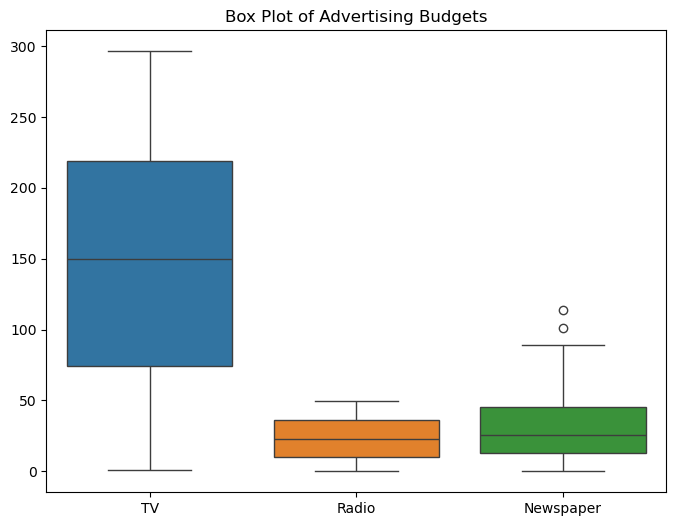

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper']])
plt.title('Box Plot of Advertising Budgets')
plt.show()

## Model 
- split the data

In [ ]:
X=data[['TV', 'Radio', 'Newspaper']] 
y=data['Sales']

- TrainTest Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [13.22651832  9.38407469  0.3139387 ]
Intercept: 3.0112063346531457


In [32]:
y_pred=model.predict(X_test)


In [33]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3.174097353976106
R^2 Score: 0.8994380241009119


## Output Analysis

- ACCURACY

In [41]:
accuracy = loaded_model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.94%


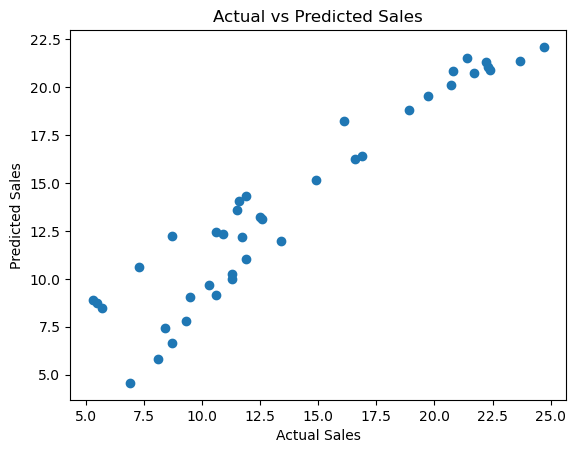

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


### Save Model

In [42]:
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('model_filename.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


## User input

In [ ]:
tv = float(input("Enter TV advertising budget: "))
radio = float(input("Enter Radio advertising budget: "))
newspaper = float(input("Enter Newspaper advertising budget: "))
input_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
predicted_sales = model.predict(input_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 637.00
